In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.multioutput import MultiOutputClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC

In [2]:
data = pd.read_excel("VeriSeti_4.xlsx")

In [3]:
# Veri setinin ilk 10 verisini ekrana ver
data.head(10)

,Maliyet,Ağırlık Sınıfı,Özerk Yapı,Kontrol Sistemi,Faydalı Yük,Motor,Arazi Tipi,Yönlendirme Sistemi,Süspansiyon Sistemi,Gövde Malzemesi,...,Güç Aktarma Sistemi,Fren Sistemi,Isı Yönetim Sistemi,Elektrik Sistemi,Elektronik Üniteler,2 Tekerlekli,4 Tekerlekli,6 Tekerlekli,8 Tekerlekli,Paletli
0,1,1,1,1,1,1,1,2,1,1,...,1,1,1,1,1,1,0,0,0,0
1,1,1,1,1,1,1,1,5,1,1,...,1,1,1,1,1,0,0,0,0,0
2,1,1,1,1,1,1,2,2,1,1,...,1,1,1,1,1,1,0,0,0,0
3,1,1,1,1,1,1,2,5,1,1,...,1,1,1,1,1,0,0,0,0,0
4,1,1,1,1,1,1,3,2,2,1,...,1,1,1,1,1,1,0,0,0,0
5,1,1,1,1,1,1,3,5,2,1,...,1,1,1,1,1,0,0,0,0,0
6,1,1,1,1,1,1,3,4,2,1,...,1,1,1,1,1,0,1,0,0,0
7,1,1,1,1,1,1,4,4,2,1,...,1,1,1,1,1,0,0,0,0,1
8,1,1,1,1,2,1,1,2,1,1,...,1,1,1,1,1,1,0,0,0,0
9,1,1,1,1,2,1,1,5,1,1,...,1,1,1,1,1,0,0,0,0,0


In [4]:
# Veri setinde boş veya eksik veri var mi?
data.isna().sum()

Maliyet                0
Ağırlık Sınıfı         0
Özerk Yapı             0
Kontrol Sistemi        0
Faydalı Yük            0
Motor                  0
Arazi Tipi             0
Yönlendirme Sistemi    0
Süspansiyon Sistemi    0
Gövde Malzemesi        0
Enerji Sistemi         0
Güç Aktarma Sistemi    0
Fren Sistemi           0
Isı Yönetim Sistemi    0
Elektrik Sistemi       0
Elektronik Üniteler    0
2 Tekerlekli           0
4 Tekerlekli           0
6 Tekerlekli           0
8 Tekerlekli           0
Paletli                0
dtype: int64

In [5]:
# Veri Setindeki corelasyon
data.corr()

,Maliyet,Ağırlık Sınıfı,Özerk Yapı,Kontrol Sistemi,Faydalı Yük,Motor,Arazi Tipi,Yönlendirme Sistemi,Süspansiyon Sistemi,Gövde Malzemesi,...,Güç Aktarma Sistemi,Fren Sistemi,Isı Yönetim Sistemi,Elektrik Sistemi,Elektronik Üniteler,2 Tekerlekli,4 Tekerlekli,6 Tekerlekli,8 Tekerlekli,Paletli
Maliyet,1.000000,0.566347,-0.010819,-0.004671,0.139245,0.265021,-0.005914,0.201652,0.830228,0.662083,...,0.269209,-0.117431,0.566579,0.473147,NaN,-0.221177,-0.274421,0.059463,0.364839,0.054104
Ağırlık Sınıfı,0.566347,1.000000,-0.007337,-0.006933,0.249858,0.471730,0.001125,0.062402,0.733189,0.734020,...,0.416010,0.374500,0.832614,0.831747,NaN,-0.390185,-0.200937,0.095586,0.350182,0.095296
Özerk Yapı,-0.010819,-0.007337,1.000000,-0.009285,-0.003233,-0.012535,0.002204,0.003819,-0.009681,-0.019154,...,-0.014975,-0.004379,-0.008569,-0.010842,NaN,0.016646,-0.011714,-0.005941,-0.009729,0.010381
Kontrol Sistemi,-0.004671,-0.006933,-0.009285,1.000000,-0.003363,-0.004935,0.006094,-0.001254,-0.005644,-0.010492,...,-0.007487,-0.002195,-0.006320,-0.007037,NaN,0.006936,0.003519,-0.003526,-0.005220,-0.000576
Faydalı Yük,0.139245,0.249858,-0.003233,-0.003363,1.000000,0.147140,-0.001336,0.000613,0.179520,0.239133,...,0.165366,0.145480,0.255212,0.262682,NaN,-0.167192,-0.013353,0.039729,0.069176,0.043760
Motor,0.265021,0.471730,-0.012535,-0.004935,0.147140,1.000000,0.004890,0.005069,0.325434,0.413725,...,0.851013,0.418363,0.403593,0.421920,NaN,-0.303466,-0.034062,0.078275,0.141668,0.069120
Arazi Tipi,-0.005914,0.001125,0.002204,0.006094,-0.001336,0.004890,1.000000,0.006004,-0.015048,-0.002548,...,0.006086,0.007165,0.001031,-0.000578,NaN,-0.004320,-0.000576,0.005280,-0.009497,0.005547
Yönlendirme Sistemi,0.201652,0.062402,0.003819,-0.001254,0.000613,0.005069,0.006004,1.000000,0.273453,-0.136441,...,0.011099,0.151497,0.120573,0.019163,NaN,-0.183143,-0.455412,-0.020240,0.445404,0.037451
Süspansiyon Sistemi,0.830228,0.733189,-0.009681,-0.005644,0.179520,0.325434,-0.015048,0.273453,1.000000,0.720653,...,0.273606,0.074316,0.665866,0.642705,NaN,-0.235574,-0.272959,0.088171,0.561253,-0.112923
Gövde Malzemesi,0.662083,0.734020,-0.019154,-0.010492,0.239133,0.413725,-0.002548,-0.136441,0.720653,1.000000,...,0.415673,0.049049,0.625625,0.730452,NaN,-0.446011,-0.155546,0.119385,0.310852,0.105785


<Axes: >

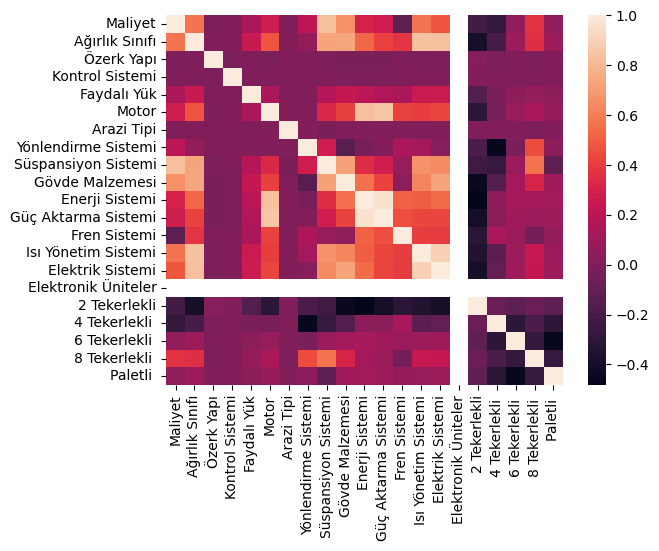

In [6]:
sns.heatmap(data.corr())

In [7]:
X = data.iloc[:,:15]

In [8]:
y = data.iloc[:,16:]

In [9]:
from sklearn.preprocessing import OneHotEncoder
import pickle

In [10]:
X.shape

(10709, 15)

In [11]:
oneHotEncoder = OneHotEncoder()

In [12]:
oneHotEncoder.fit(X)

OneHotEncoder()

In [13]:
X.shape

(10709, 15)

In [14]:
X = oneHotEncoder.transform(X).toarray()


In [15]:
X[1].shape

(66,)

In [ ]:
# with open('encoder2','wb') as f:
#    pickle.dump(oneHotEncoder,f)

In [ ]:
#X = pd.get_dummies(X,columns=['Maliyet', 'Ağırlık Sınıfı', 'Özerk Yapı', 'Kontrol Sistemi',
#       'Faydalı Yük', 'Motor', 'Arazi Tipi', 'Yönlendirme Sistemi',
#       'Süspansiyon Sistemi', 'Gövde Malzemesi', 'Enerji Sistemi',
#       'Güç Aktarma Sistemi', 'Fren Sistemi', 'Isı Yönetim Sistemi',
#       'Elektrik Sistemi'],drop_first=True)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [17]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.25,shuffle=True)

In [18]:
X.shape

(10709, 66)

In [21]:
x_test[:1]

array([[1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        0., 0.]])

In [22]:
from tensorflow.keras import optimizers
adam = optimizers.Adam(learning_rate=0.01)
adagrad = optimizers.Adagrad(learning_rate=0.01)
nadam = optimizers.Nadam(learning_rate=0.001)

sgd = optimizers.SGD(learning_rate=0.01)

### KNN Classification

In [ ]:
knn = KNeighborsClassifier(n_neighbors=41)

In [ ]:
knn.fit(x_train,y_train)

In [ ]:
predict = knn.predict(x_test)

In [ ]:
f1_score = classification_report(predict,y_test)

In [ ]:
acc = accuracy_score(predict,y_test)
acc

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(criterion='gini',
    splitter='best')

In [ ]:
dt.fit(x_train,y_train)

In [ ]:
predict = dt.predict(x_test)

In [ ]:
acc = accuracy_score(predict,y_test)

In [ ]:
acc

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=150)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
predict = rf.predict(x_test)

In [ ]:
acc = accuracy_score(predict,y_test)

In [ ]:
acc

### Naive Biase

In [ ]:
nb = MultiOutputClassifier(MultinomialNB())

In [ ]:
nb.fit(x_train,y_train)

In [ ]:
predict = nb.predict(x_test)

In [ ]:
acc = accuracy_score(predict,y_test)

In [ ]:
acc

In [ ]:
x_train.shape
x_train.shape

### Support Vector Machine

In [ ]:
svm = SVC()

In [ ]:
y_train_new = y_train.to_numpy()
y_new = y_train_new.reshape(-1,1)
x_train = x_train.to_numpy()

In [ ]:
print(x_train.shape)
print(y_new.shape)

In [ ]:
svm.fit(x_train,y_train_new.argmax(axis=1))

In [ ]:
predictions = svm.predict(x_test.to_numpy())

In [ ]:
acc = accuracy_score(predictions,y_test.to_numpy().argmax(axis=1))

In [ ]:
acc

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1,restore_best_weights=True)

### ANN

In [23]:
model = Sequential()

# 'relu' 'sigmoid'

model.add(Dense(64,activation="tanh",input_shape=(None,66)))
model.add(Dropout(0.5))
model.add(Dense(128,activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(64,activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(16,activation="tanh"));
model.add(Dropout(0.5))
model.add(Dense(5,activation="softmax"))

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 64)          4288      
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 dense_1 (Dense)             (None, None, 128)         8320      
                                                                 
 dropout_1 (Dropout)         (None, None, 128)         0         
                                                                 
 dense_2 (Dense)             (None, None, 64)          8256      
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 dense_3 (Dense)             (None, None, 16)          1

In [25]:
model.fit(x_train,
          y_train,
          verbose=1,
          epochs=200,
          batch_size=32,
          validation_data=(x_valid,y_valid)
         )

Epoch 1/200


201/201 [==============================] - 1s 3ms/step - loss: 1.8074 - accuracy: 0.2196 - val_loss: 1.4846 - val_accuracy: 0.2848
Epoch 2/200
201/201 [==============================] - 0s 2ms/step - loss: 1.7232 - accuracy: 0.2397 - val_loss: 1.3863 - val_accuracy: 0.3235
Epoch 3/200
201/201 [==============================] - 0s 2ms/step - loss: 1.6482 - accuracy: 0.2633 - val_loss: 1.3243 - val_accuracy: 0.3436
Epoch 4/200
201/201 [==============================] - 0s 2ms/step - loss: 1.5923 - accuracy: 0.2884 - val_loss: 1.2799 - val_accuracy: 0.3702
Epoch 5/200
201/201 [==============================] - 0s 2ms/step - loss: 1.5701 - accuracy: 0.2937 - val_loss: 1.2458 - val_accuracy: 0.4178
Epoch 6/200
201/201 [==============================] - 0s 2ms/step - loss: 1.5242 - accuracy: 0.3136 - val_loss: 1.2171 - val_accuracy: 0.4510
Epoch 7/200
201/201 [==============================] - 0s 2ms/step - loss: 1.5043 - accuracy: 0.3146 - val_loss: 1.1927 - val_accuracy: 0.48

Epoch 55/200
201/201 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.6814 - val_loss: 0.4436 - val_accuracy: 0.7852
Epoch 56/200
201/201 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.6940 - val_loss: 0.4377 - val_accuracy: 0.7899
Epoch 57/200
201/201 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.6909 - val_loss: 0.4318 - val_accuracy: 0.7899
Epoch 58/200
201/201 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.6890 - val_loss: 0.4265 - val_accuracy: 0.7899
Epoch 59/200
201/201 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6976 - val_loss: 0.4210 - val_accuracy: 0.7904
Epoch 60/200
201/201 [==============================] - 0s 2ms/step - loss: 0.6781 - accuracy: 0.6951 - val_loss: 0.4159 - val_accuracy: 0.7955
Epoch 61/200
201/201 [==============================] - 0s 2ms/step - loss: 0.6519 - accuracy: 0.7096 - val_loss: 0.4107 - val_accuracy:

Epoch 112/200
201/201 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.8008 - val_loss: 0.2441 - val_accuracy: 0.9949
Epoch 113/200
201/201 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8090 - val_loss: 0.2400 - val_accuracy: 0.9949
Epoch 114/200
201/201 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8078 - val_loss: 0.2361 - val_accuracy: 0.9953
Epoch 115/200
201/201 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8067 - val_loss: 0.2320 - val_accuracy: 0.9953
Epoch 116/200
201/201 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8104 - val_loss: 0.2293 - val_accuracy: 0.9958
Epoch 117/200
201/201 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8128 - val_loss: 0.2259 - val_accuracy: 0.9958
Epoch 118/200
201/201 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8137 - val_loss: 0.2221 - val_ac

201/201 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.8882 - val_loss: 0.0990 - val_accuracy: 0.9958
Epoch 169/200
201/201 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8814 - val_loss: 0.0977 - val_accuracy: 0.9958
Epoch 170/200
201/201 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8816 - val_loss: 0.0962 - val_accuracy: 0.9958
Epoch 171/200
201/201 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8733 - val_loss: 0.0946 - val_accuracy: 0.9958
Epoch 172/200
201/201 [==============================] - 0s 2ms/step - loss: 0.2952 - accuracy: 0.8814 - val_loss: 0.0932 - val_accuracy: 0.9958
Epoch 173/200
201/201 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.8854 - val_loss: 0.0919 - val_accuracy: 0.9958
Epoch 174/200
201/201 [==============================] - 0s 2ms/step - loss: 0.2857 - accuracy: 0.8861 - val_loss: 0.0903 - val_accuracy: 0.9958

In [ ]:
# print(model.history.history)

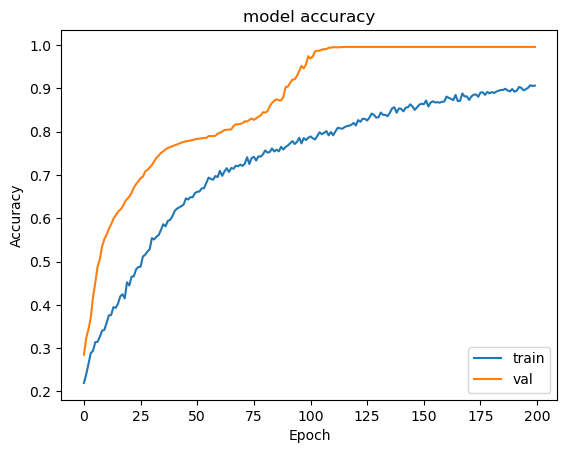

In [26]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig('acc.png')
plt.show()

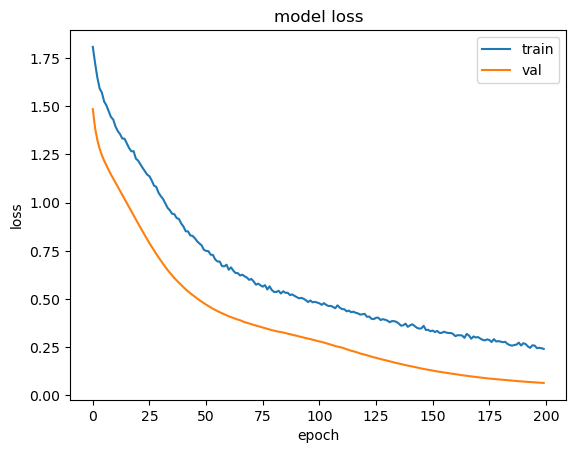

In [27]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.savefig('loss.png')
plt.show()

In [ ]:
h = model.history.history

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
 model.save("ysa_sgd_tanh2.keras")

In [ ]:
model = load_model('ysa_sgd_tanh2.keras')

In [30]:
predict = model.predict(x_test)
predict = (predict>0.5)*1
acc = accuracy_score(y_test,predict)

67/67 [==============================] - 0s 712us/step


In [31]:
acc

0.9705882352941176

In [ ]:
predict

In [ ]:
data.shape

### Cross Validaiton on ANN

In [ ]:
# from sklearn.model_selection import cross_val_score, KFold,cross_validate

In [40]:
# X*1

In [ ]:
# X = np.array(X)*1
# y = np.array(y)*1

In [ ]:
# kf = KFold(n_splits=10, shuffle=True, random_state=42)


In [ ]:
# epoch = 50

# fold_number = 1

# batch_size = 32

# acc_per_fold = []

# loss_per_fold = []

for train,test in kf.split(X,y):
    
    model = Sequential()

    model.add(Dense(32,activation="relu",input_shape=(None,51)))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(128,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(6,activation="softmax"))

    model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
    
    print('------------------------------------------------------------')
    print(f'Trainin for {fold_number} fold')
    
    model.fit(X[train],
              y[train],
              batch_size=batch_size,
              epochs=epoch)
    
    scores = model.evaluate(X[test],y[test])
    print(f"Score for {fold_number} fold: = {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%")
    
    acc_per_fold.append(scores[1]*100)
    loss_per_fold.append(scores[0])
    
    fold_number +=1

In [ ]:
# acc_per_fold

### Plot the result of the model

In [44]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [45]:
print(classification_report(np.array(y_test).argmax(axis=1),predict.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      0.99      1.00       333
           2       1.00      1.00      1.00       685
           3       1.00      1.00      1.00       312
           4       1.00      1.00      1.00       684

    accuracy                           1.00      2142
   macro avg       1.00      1.00      1.00      2142
weighted avg       1.00      1.00      1.00      2142



In [38]:
cm = confusion_matrix(np.array(y_test).argmax(axis=1),predict.argmax(axis=1))

In [39]:
f1_score_ = f1_score(np.array(y_test).argmax(axis=1),predict.argmax(axis=1),
                                           average='micro') 
f1_score_

0.9985994397759104

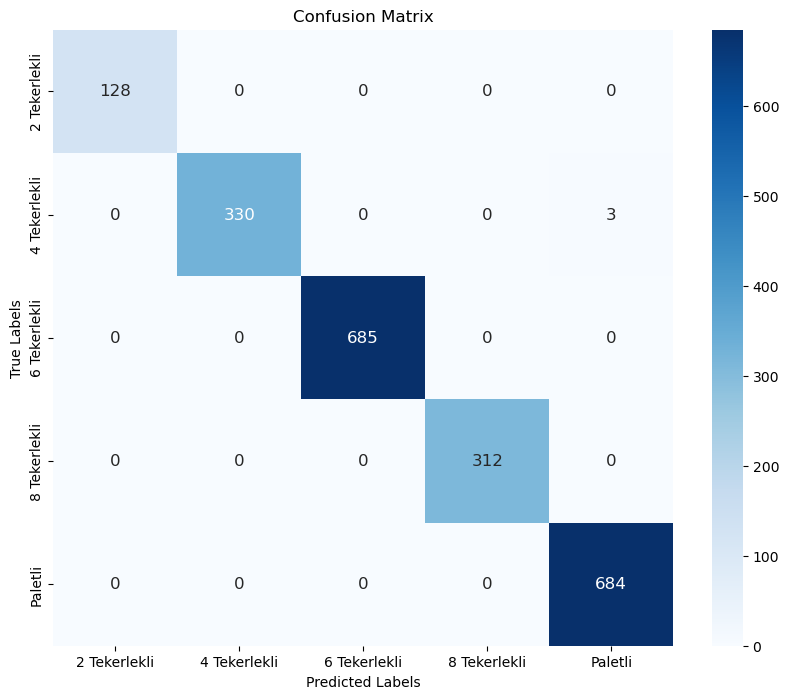

In [36]:
class_labels = ['2 Tekerlekli', '4 Tekerlekli', '6 Tekerlekli', '8 Tekerlekli', 'Paletli']

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm,annot=True,  annot_kws={"size": 12},fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('confusion.png')
plt.show()

In [ ]:
y_test['3 Tekerlekli'].sum()


In [ ]:
predict

In [ ]:
np.array(predict).argmax(axis=1)

In [ ]:
cr = classification_report(predict,y_test)

In [ ]:
predict = model.predict(x_test)

In [ ]:
predict = predict>0.5

In [ ]:
predict = predict*1

In [ ]:
sum_ = []

In [ ]:
for x in predict:
    if x[1]==1:
        sum_.append(x[1])

In [ ]:
len(sum_)

In [ ]:
len(y_test)

In [ ]:
len(predict)

In [ ]:
predict = model.predict(x_test)

In [ ]:
for x in predict:
    print(x[1]>0.5)

In [ ]:
a = 1
for x in np.array(y):        
    if x[1]==1:
        a+=1
    

In [ ]:
a

In [ ]:
model.history.history

In [ ]:
data_input = {'maliyet': 1, 'agirlik_sinifi': 2, 'ozerk_yapi': 1, 'kontrol_sis': 2, 'faydali_yuk': 1, 'motor': 2, 'arazi_tipi': 1, 'yonlendirme_sis': 4, 'suspansiyon_sis': 2, 'govde_malzemesi': 3, 'enerji_sis': 2, 'guc_aktarma': 1, 'fren_sistemi': 1, 'isi_yonetim': 1, 'elektrik_sistemi': 2, 'elektronik_unite': 1}

In [ ]:
df = pd.DataFrame(data_input,index=[0])

In [ ]:
df.columns

In [ ]:
inputs = df.iloc[0].values

In [ ]:
new_in = inputs[:15]
new_in=new_in.reshape(1, -1)
new_in.shape

In [ ]:
#array([1, 1, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
res = oneHotEncoder.transform(new_in)

In [ ]:
res = res.toarray()

In [ ]:
res

In [ ]:
prediction=model.predict(res)

In [ ]:
x_test.iloc[:1]

In [ ]:
prediction = prediction>0.5


In [ ]:
prediction[0]

In [ ]:
def model_sonuc(inputs,encoder,model) -> str:
    
    inputs = pd.DataFrame(inputs,index=[0])
    
    inputs = inputs.iloc[0].values
    
    inputs = inputs[:15].reshape(1, -1)
    
    encoded = oneHotEncoder.transform(inputs).toarray()
    
    predictions = model.predict(encoded)
    
    predictions = predictions>0.5
    
    if(predictions[0][0]==True):
        return "2 Tekerlekli"
    
    elif(predictions[0][1]==True):
        return "4 Tekerlekli"
    
    elif(predictions[0][2]==True):
        return "6 Tekerlekli"
    
    elif(predictions[0][3]==True):
        return "8 Tekerlekli"
    
    elif(predictions[0][4]==True):
        return "Paletli"
    

In [ ]:
res = model_sonuc(data_input,oneHotEncoder,model)
res

In [ ]:
with open('encoder', 'rb') as f:
        oneHotEncoder = pickle.load(f)

In [ ]:
def model_sonuc(inputs) -> str:

    with open('encoder2', 'rb') as f:
        oneHotEncoder = pickle.load(f)

    model = load_model("ysa_sgd_tanh2.keras")

    inputs = pd.DataFrame(inputs, index=[0])

    inputs = inputs.iloc[0].values

    inputs = inputs[:15].reshape(1, -1)

    encoded = oneHotEncoder.transform(inputs).toarray()

    predictions = model.predict(encoded)

    predictions = predictions > 0.5

    if (predictions[0][0] == True):
        return "2 Tekerlekli"

    elif (predictions[0][1] == True):
        return "4 Tekerlekli"

    elif (predictions[0][2] == True):
        return "6 Tekerlekli"

    elif (predictions[0][3] == True):
        return "8 Tekerlekli"

    elif (predictions[0][4] == True):
        return "Paletli"


In [ ]:
res = model_sonuc({'maliyet': 1, 'agirlik_sinifi': 2, 'ozerk_yapi': 1, 'kontrol_sis': 2, 'faydali_yuk': 1, 'motor': 2, 'arazi_tipi': 1, 'yonlendirme_sis': 4, 'suspansiyon_sis': 2, 'govde_malzemesi': 3, 'enerji_sis': 2, 'guc_aktarma': 1, 'fren_sistemi': 1, 'isi_yonetim': 1, 'elektrik_sistemi': 2, 'elektronik_unite': 1})

In [ ]:
res